In [1]:
import sys
sys.path.append('../utils')
sys.path.append('../core')
sys.path.append('../')
import numpy as np
import scipy
import tqdm
import utils
import geometry
from core import *

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import glob

In [2]:
test_phantom = phantom.Phantom(source_path = None,
            voxel_dims = (0.5e-3,0.5e-3,0.5e-3),
            matrix_dims = (100,100,100),
            baseline = (1500, 1000),
            seed = 5678,)

blood = tissue.Tissue(name='blood', c=1578, rho=1060, sigma=5.3, scale=0.00001, label=1)
myocardium = tissue.Tissue(name='myocardium', c=1561.3, rho=1081, sigma=30, scale=0.0001, label=2)
fat = tissue.Tissue(name='fat', c=1450, rho=920, sigma=10, scale=0.0001, label=3)

pos = 0.6

# test_phantom.add_tissue_sphere((pos,-pos,0), 2, blood)
# test_phantom.add_tissue_sphere((pos,0,0), 4, blood)
# test_phantom.add_tissue_sphere((pos,pos,0), 8, blood)

# test_phantom.add_tissue_sphere((-pos,-pos,0), 4, fat)
# test_phantom.add_tissue_sphere((-pos,0,0), 8, fat)
# test_phantom.add_tissue_sphere((-pos,pos,0), 2, fat)

# test_phantom.add_tissue_sphere((0,-pos,0), 8, myocardium)
# test_phantom.add_tissue_sphere((0,0,0), 2, myocardium)
# test_phantom.add_tissue_sphere((0,pos,0), 4, myocardium)

test_phantom.add_tissue_sphere((pos,0,0), 4, myocardium)
# test_phantom.add_tissue_sphere((0,-pos,0), 4, myocardium)


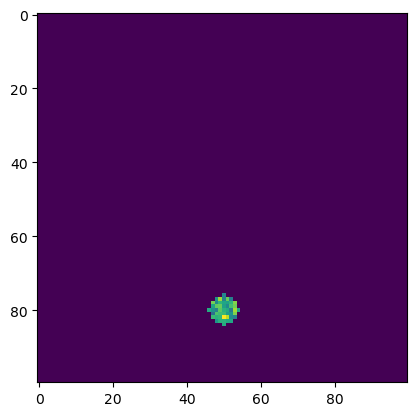

In [3]:
plt.imshow(test_phantom.get_complete()[0,:,:,test_phantom.matrix_dims[2]//2])

In [4]:
transducers = [transducer.Planewave(max_frequency=1e6,
                                    elements = 32, 
                                    width = 20e-3,
                                    height =  20e-3,
                                    sensor_sampling_scheme = 'not_centroid', 
                                    sweep = 0,
                                    ray_num = 1, 
                                    imaging_ndims = 2,
                                    focus_elevation = 20e-3,
                                    ) for i in range(2)]

for t in transducers:
    t.make_sensor_coords(test_phantom.baseline[0])

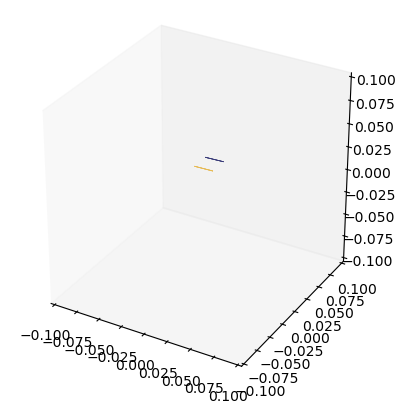

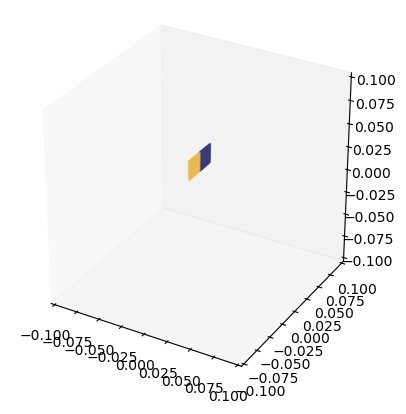

In [5]:
test_transducer_set = transducer_set.TransducerSet(transducers, seed=8888)
#test_transducer_set.generate_extrinsics(shape="spherical", extrinsics_kwargs={'r_mean': 0e-3, 'view_std': 0, 'yaw_fraction': 0, 'pitch_fraction': 0, 'roll_fraction': 0})
test_transducer_set.assign_pose(0, geometry.Transform([0,0,0], [0,0.01,0.03]))
test_transducer_set.assign_pose(1, geometry.Transform([0,0,0], [0,-0.01,0.03]))
test_transducer_set.plot_transducer_fovs(scale=0.1)
test_transducer_set.plot_transducer_coords(scale=0.1)

In [6]:
# test_sensor = sensor.Sensor(transducer_set=test_transducer_set, aperture_type='pressure_field')
test_sensor = sensor.Sensor(transducer_set=test_transducer_set, aperture_type='extended_aperture')

[ 0.    -0.005  0.03 ]
[0.    0.005 0.03 ]


In [8]:
simprops = simulation.SimProperties(
                grid_size   = (65e-3,60e-3,20e-3),
                voxel_size  = (0.1e-3,0.1e-3,0.1e-3),
                PML_size    = (32,8,8),
                PML_alpha   = 2,
                t_end       = 12e-5,           # [s]
                bona        = 6,               # parameter b/a determining degree of nonlinear acoustic effects
                alpha_coeff = 0.5, 	           # [dB/(MHz^y cm)]
                alpha_power = 1.5,
                )

In [1]:
test_experiment = experiment.Experiment(
                 simulation_path = '../experiment_files/planewave_test_02',
                 sim_properties  = simprops,
                 phantom         = test_phantom,
                 transducer_set  = test_transducer_set,
                 sensor          = test_sensor,
                 nodes           = 1,
                 results         = None,
                 indices         = None,
                 workers         = 1,
                 additional_keys = ['p_max']
                 )

test_experiment.save()

NameError: name 'experiment' is not defined

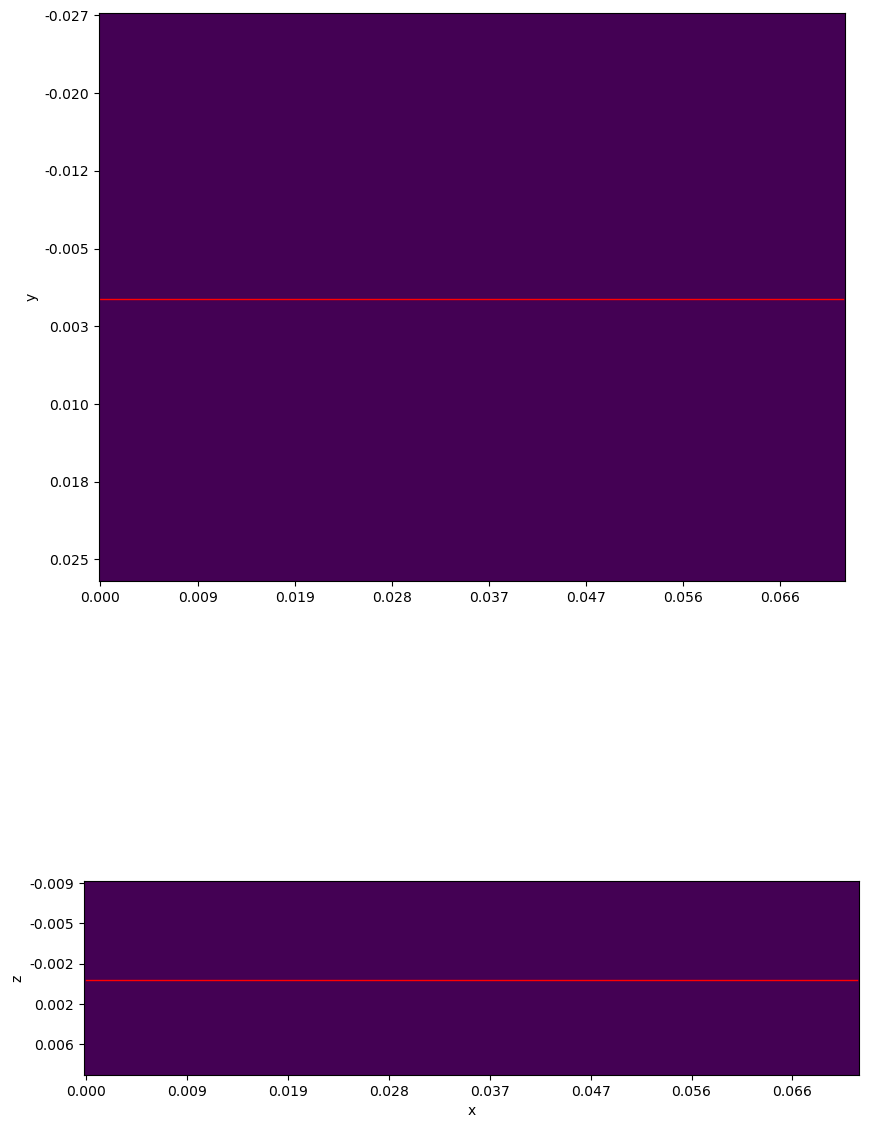

In [13]:
test_experiment.plot_ray_path(0)

In [14]:
test_experiment = experiment.Experiment.load('../experiment_files/planewave_test_02')
test_experiment.run(dry=True)

Number of simulation results (0) is less than the expected number of simulation results (2), are you sure the simulation finished running?
dry run of simulation


  0%|          | 0/2 [00:00<?, ?it/s]

[ 0.00000000e+00 -4.34723371e-19  2.99999993e-02]
[0.00000000e+00 5.33761070e-19 2.99999993e-02]
[ 0.00000000e+00 -4.34723371e-19  2.99999993e-02]
[0.00000000e+00 5.33761070e-19 2.99999993e-02]
[ 0.00000000e+00 -4.34723371e-19  2.99999993e-02]
[0.00000000e+00 5.33761070e-19 2.99999993e-02]
[ 0.00000000e+00 -4.34723371e-19  2.99999993e-02]
[0.00000000e+00 5.33761070e-19 2.99999993e-02]


 50%|█████     | 1/2 [00:00<00:00,  1.59it/s]

[ 0.00000000e+00 -4.34723371e-19  2.99999993e-02]
[0.00000000e+00 5.33761070e-19 2.99999993e-02]
[ 0.00000000e+00 -4.34723371e-19  2.99999993e-02]
[0.00000000e+00 5.33761070e-19 2.99999993e-02]


100%|██████████| 2/2 [00:00<00:00,  2.18it/s]


In [ ]:
test_experiment.run(repeat=True)

running with 1 workers

[ 0.00000000e+00 -4.34723371e-19  2.99999993e-02]
[ 0.   -0.01  0.  ]
preparation for sim    0 completed in            5.87 seconds

[ 0.00000000e+00 -4.34723371e-19  2.99999993e-02]
[0.   0.01 0.  ]
preparation for sim    1 completed in            5.97 seconds

True
┌───────────────────────────────────────────────────────────────┐
│                  kspaceFirstOrder-CUDA v1.3                   │
├───────────────────────────────────────────────────────────────┤
│ Reading simulation configuration:                        Done │
│ Selected GPU device id:                                Failed │
└───────────────────────────────────────────────────────────────┘



Process run:
Traceback (most recent call last):
  File "/home/software/anaconda3/2023.07/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/software/anaconda3/2023.07/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/aparnank/MUSiK/debugging/../core/experiment.py", line 260, in run_worker
    simulation.run()
  File "/home/aparnank/MUSiK/debugging/../core/simulation.py", line 201, in run
    self.__run_by_index(self.index, dry=self.dry)
  File "/home/aparnank/MUSiK/debugging/../core/simulation.py", line 234, in __run_by_index
    time_array, signals, other_signals = self.__run_simulation(self.prepped_simulation, self.additional_keys)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/aparnank/MUSiK/debugging/../core/simulation.py", line 306, in __run_simulation
    sensor_data = kwave.kspaceFirstOrd

In [1]:
test_experiment.add_results()

NameError: name 'test_experiment' is not defined

In [13]:
test_reconstruction = reconstruction.Compounding(experiment=test_experiment)

In [14]:
image = test_reconstruction.compound()

100%|██████████| 32/32 [03:31<00:00,  6.62s/it]


In [15]:
image.shape

(67, 67, 67)

In [16]:
test_reconstruction.results

In [17]:
element_15 = np.array([test_reconstruction.results[i][1][15] for i in range(len(test_reconstruction.results))])
element_0 = np.array([test_reconstruction.results[i][1][0] for i in range(len(test_reconstruction.results))])

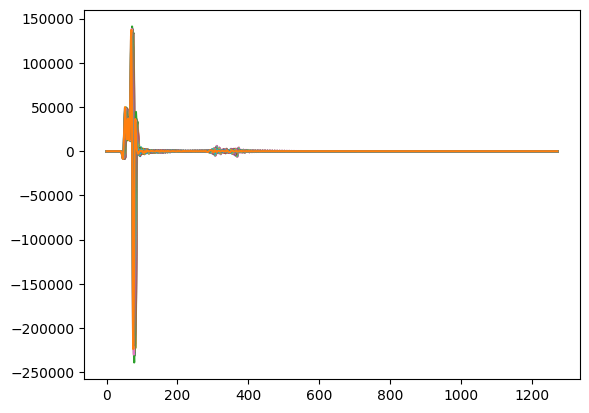

In [18]:
plt.plot(element_15.T)

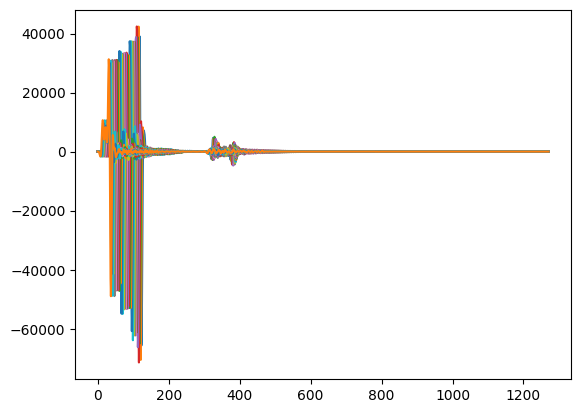

In [19]:
plt.plot(element_0.T)

In [20]:
test_reconstruction.results[0]

(array([0.0000e+00, 7.5000e-08, 1.5000e-07, ..., 9.5175e-05, 9.5250e-05,
        9.5325e-05]),
 array([[ 0.00000000e+00, -7.28228362e-04, -1.27120782e-02, ...,
         -1.79369614e-01,  9.56199288e-01,  1.56473136e+00],
        [ 0.00000000e+00, -7.64838187e-04, -1.33454418e-02, ...,
         -3.22526962e-01,  1.01123023e+00,  1.70442724e+00],
        [ 0.00000000e+00,  7.84905627e-04,  1.36962850e-02, ...,
          7.20960498e-01,  2.16419786e-01, -3.80434006e-01],
        ...,
        [ 0.00000000e+00,  8.87785777e-02,  1.49551654e+00, ...,
         -8.45009610e-02, -1.82907239e-01, -1.19636454e-01],
        [ 0.00000000e+00, -1.58661753e-01, -2.60634351e+00, ...,
         -1.10497832e+00,  3.24151248e-01,  1.49674416e+00],
        [ 0.00000000e+00, -1.45301640e+00, -1.96122711e+02, ...,
         -1.42141783e+00, -2.05290154e-01,  1.19330966e+00]]),
 array([ 35170.05 ,  68624.46 ,  62164.113,  66701.99 ,  67426.55 ,
         62171.633,  67426.15 ,  62172.76 ,  67426.79 ,  62172.406

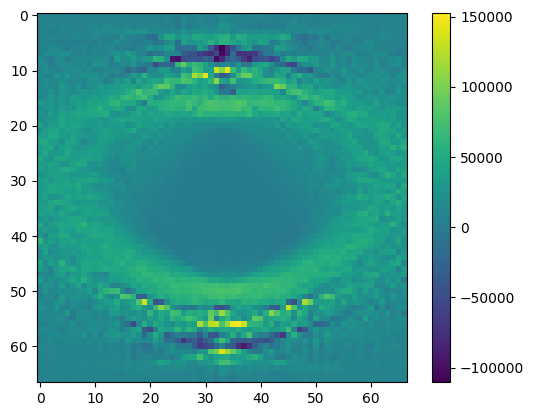

In [21]:
plt.imshow(image[:,:,image.shape[2]//2])
plt.colorbar()

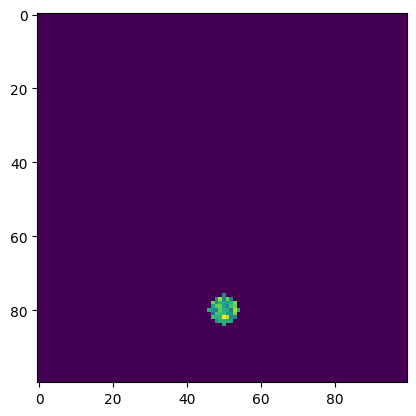

In [22]:
plt.imshow(test_phantom.get_complete()[0,:,:,test_phantom.matrix_dims[2]//2])

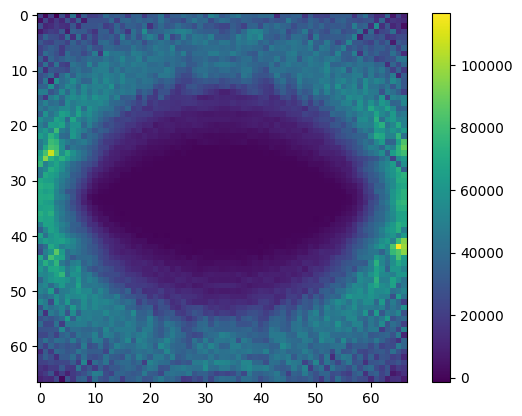

In [23]:
plt.imshow(image[image.shape[0]//2,:,:])
plt.colorbar()

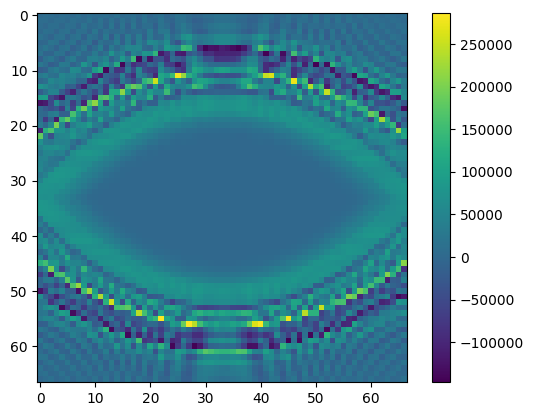

In [24]:
plt.imshow(image[:,image.shape[1]//2,:])
plt.colorbar()

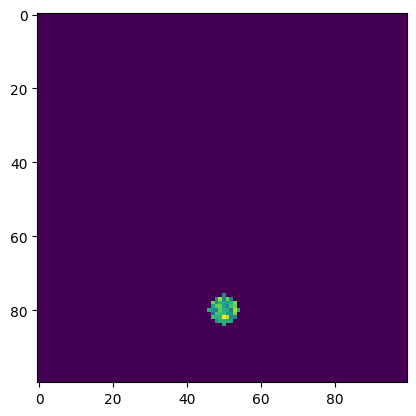

In [25]:
plt.imshow(test_phantom.get_complete()[0,:,:,test_phantom.matrix_dims[2]//2])

In [26]:
im = test_reconstruction.results[0][1]

In [27]:
im.shape

(32, 1272)

In [28]:
for frame in tqdm.tqdm(range(0,im.shape[-1],10)):
    plt.imshow(im[:,:,frame], cmap='bwr')
    plt.colorbar()
    plt.savefig(f'../experiment_files/outputs/frame_{str(frame).zfill(4)}.png', dpi=50)
    plt.close()

  0%|          | 0/128 [00:00<?, ?it/s]


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed